# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 7. PCA with R

https://mml-book.github.io/book/mml-book.pdf (A good introduction)

PCA is a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables (p) into smaller k (k<<p) number of uncorrelated variables called principal components while retaining as much of the variation of the original data as possible. In the context of Machine Learning (ML), PCA is an unsupervised machine learning algorithm in which we find important variables that can be useful for further regression, clustering, and classification tasks.

PCA considers the correlation among variables. If the correlation is very high, PCA attempts to combine highly correlated variables and finds the directions of maximum variance in higher-dimensional data. 

### Package for PCA visualization

Source: http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

We’ll use the factoextra R package to create a ggplot2-based elegant visualization.

You can install it from CRAN: install.packages("factoextra")

Or, install the latest developmental version from github: 
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Load factoextra as follow:
library(factoextra)

In [4]:
#install.packages("factoextra")
library("factoextra")

data(decathlon2)
decathlon2.active <- decathlon2[1:23, 1:10]
print(decathlon2.active)

            X100m Long.jump Shot.put High.jump X400m X110m.hurdle Discus
SEBRLE      11.04      7.58    14.83      2.07 49.81        14.69  43.75
CLAY        10.76      7.40    14.26      1.86 49.37        14.05  50.72
BERNARD     11.02      7.23    14.25      1.92 48.93        14.99  40.87
YURKOV      11.34      7.09    15.19      2.10 50.42        15.31  46.26
ZSIVOCZKY   11.13      7.30    13.48      2.01 48.62        14.17  45.67
McMULLEN    10.83      7.31    13.76      2.13 49.91        14.38  44.41
MARTINEAU   11.64      6.81    14.57      1.95 50.14        14.93  47.60
HERNU       11.37      7.56    14.41      1.86 51.10        15.06  44.99
BARRAS      11.33      6.97    14.09      1.95 49.48        14.48  42.10
NOOL        11.33      7.27    12.68      1.98 49.20        15.29  37.92
BOURGUIGNON 11.36      6.80    13.46      1.86 51.16        15.67  40.49
Sebrle      10.85      7.84    16.36      2.12 48.36        14.05  48.72
Clay        10.44      7.96    15.23      2.06 49.1

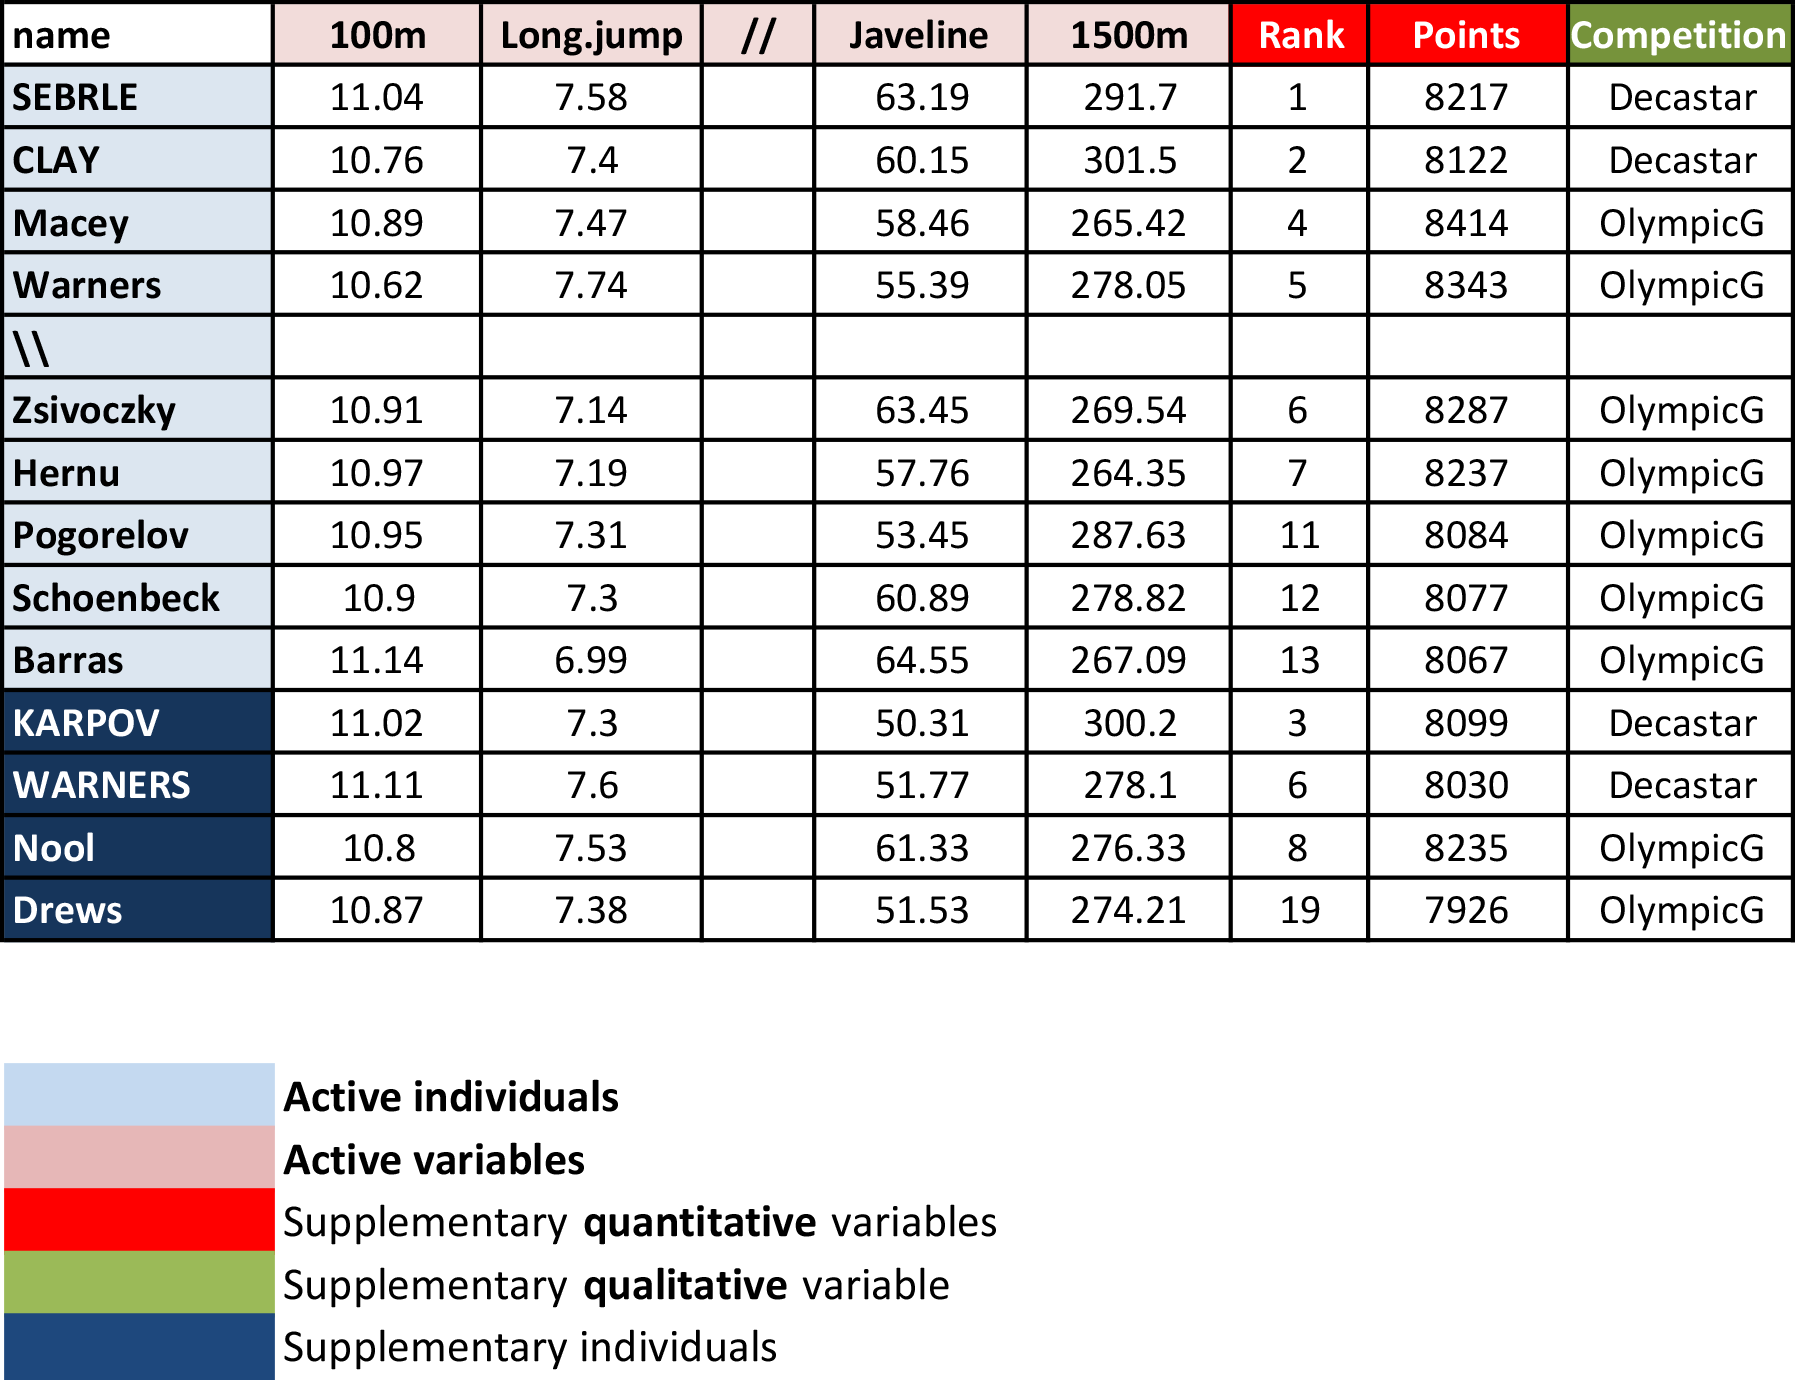

### Compute PCA in R

In [7]:
library(factoextra)
res.pca <- prcomp(decathlon2.active, scale = TRUE) 
#A good discussion about scaling (standardazation) and normalization: 
#https://www.kaggle.com/code/alexisbcook/scaling-and-normalization#
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

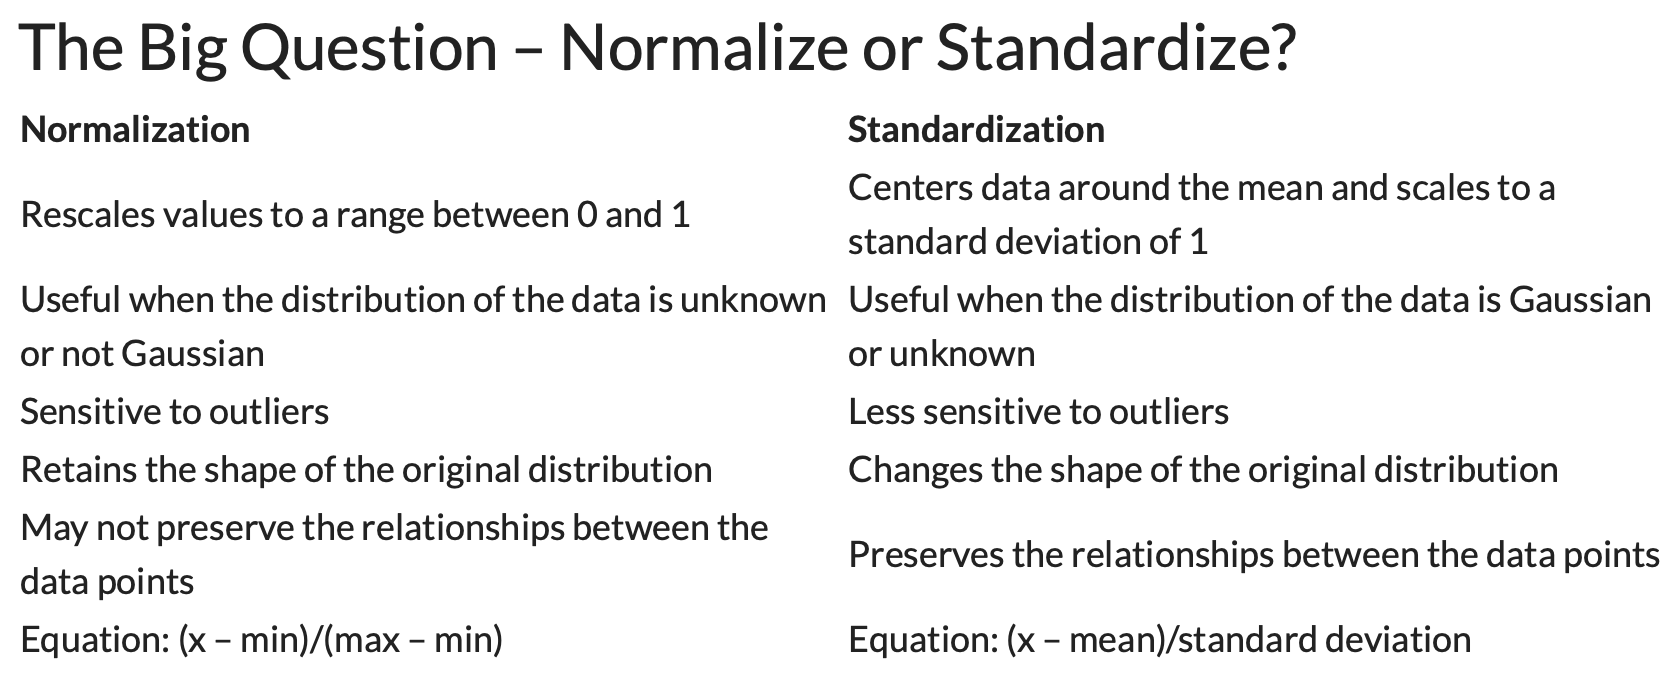

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized, and standardized data and comparing the performance for the best results.

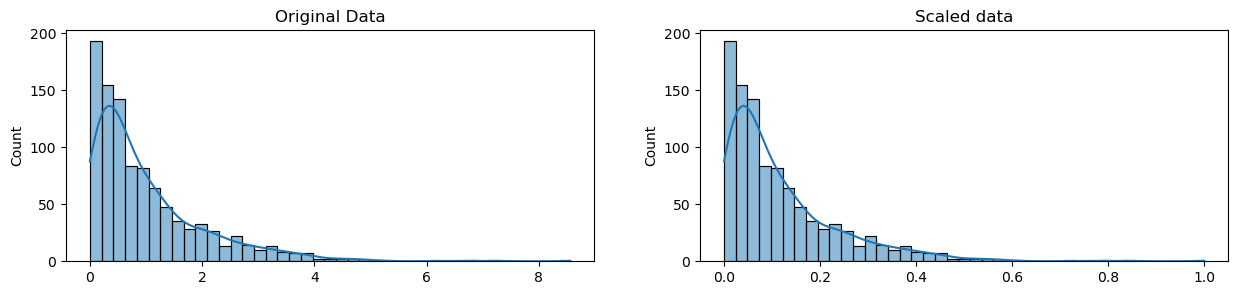

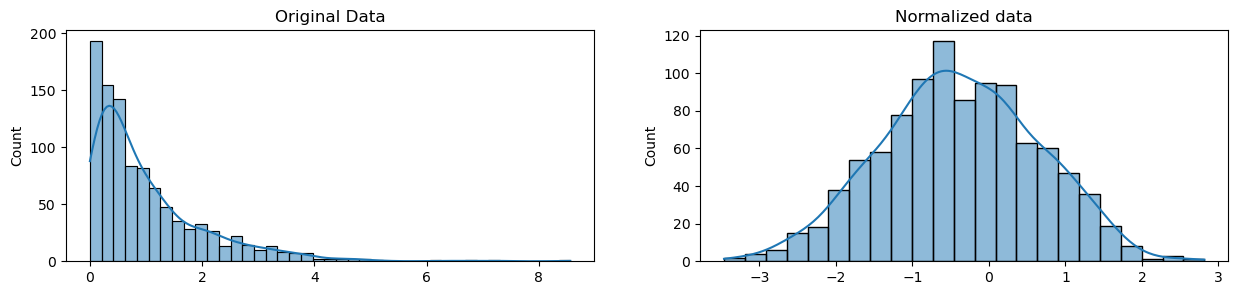

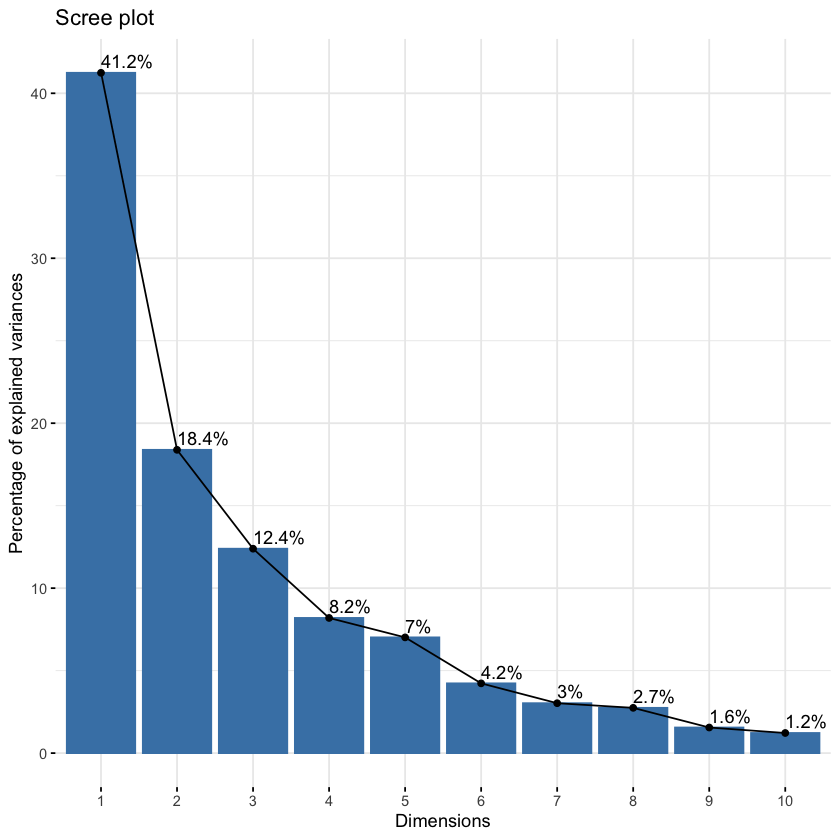

In [9]:
fviz_eig(res.pca, addlabels = TRUE) 
#It shows the percentage of variances explained by each principal component

- Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. 
- In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. 
- In other words, it tells us how much of the total variance is “explained” by each component. 
- This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis. 
- For example, let’s say you want to build a machine learning model to predict housing prices. The explained variance would tell us how much of the variation in housing prices can be explained by the model. In this case, a higher explained variance would be better because it would mean that the model is doing a better job of predicting housing prices. 

### Correlation circle

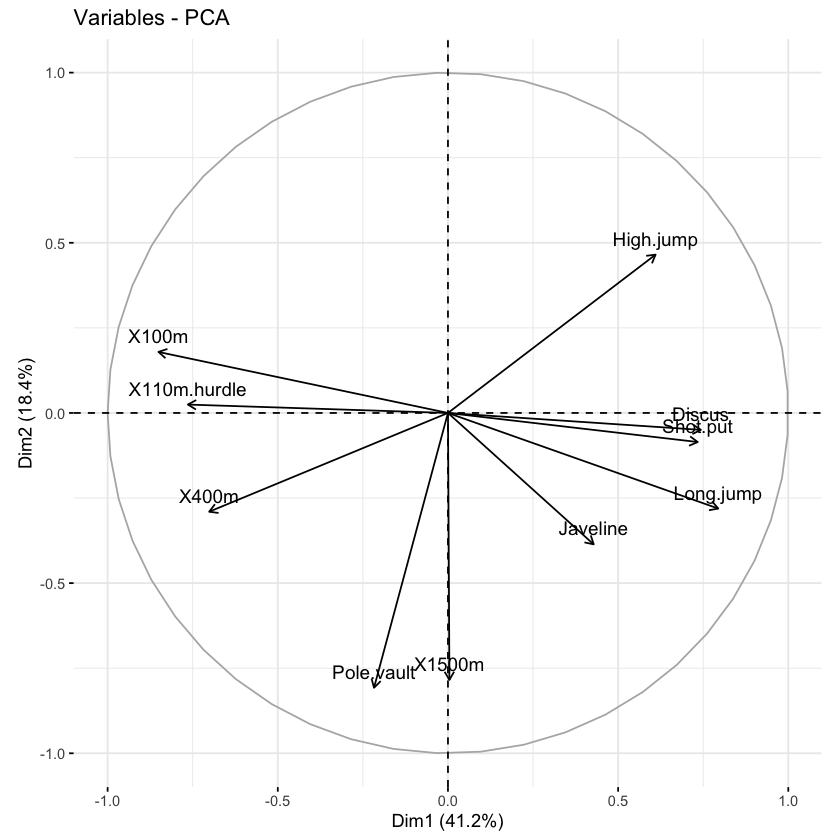

In [11]:
fviz_pca_var(res.pca, col.var = "black")

#This plot is also known as variable correlation plots. 
#It shows the relationships between all variables. It can be interpreted as follows:

#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin
#(opposed quadrants).
#The distance between variables and the origin measures the quality of the variables 
#on the factor map. Variables that are away from the origin are well represented on 
#the factor map.

### Quality of representation

In [14]:
#The quality of representation of the variables on factor map is called cos2.

#A high cos2 indicates a good representation of the variable on the principal component. 

library("corrplot")

It’s possible to color variables by their cos2 values using the argument col.var = "cos2". This produces a gradient of colors. In this case, the argument gradient.cols can be used to provide a custom color. For instance, gradient.cols = c("white", "blue", "red") means that:

- variables with low cos2 values will be colored in white
- variables with mid cos2 values will be colored in blue
- variables with high cos2 values will be colored in red

                    Dim.1        Dim.2       Dim.3        Dim.4      Dim.5
X100m        7.235641e-01 0.0321836641 0.090936280 0.0011271597 0.03780845
Long.jump    6.307229e-01 0.0788806285 0.036307981 0.0133147506 0.05436203
Shot.put     5.386279e-01 0.0072938636 0.267907488 0.0165041211 0.06190783
High.jump    3.722025e-01 0.2164242070 0.108956221 0.0208947375 0.16216747
X400m        4.922473e-01 0.0842034209 0.080390914 0.1856106269 0.01079698
X110m.hurdle 5.838873e-01 0.0006121077 0.201499837 0.0002854712 0.05027463
Discus       5.523596e-01 0.0024662013 0.031161138 0.1560322304 0.16665918
Pole.vault   4.720540e-02 0.6519772763 0.008846856 0.1149106765 0.04914437
Javeline     1.833781e-01 0.1490803723 0.364966189 0.1100478063 0.03912992
X1500m       1.830545e-05 0.6154091638 0.048167378 0.2007126089 0.06930197
                    Dim.6        Dim.7        Dim.8        Dim.9       Dim.10
X100m        1.251375e-03 0.0083423353 1.096563e-02 0.0918480768 1.972956e-03
Long.jump    1.1375

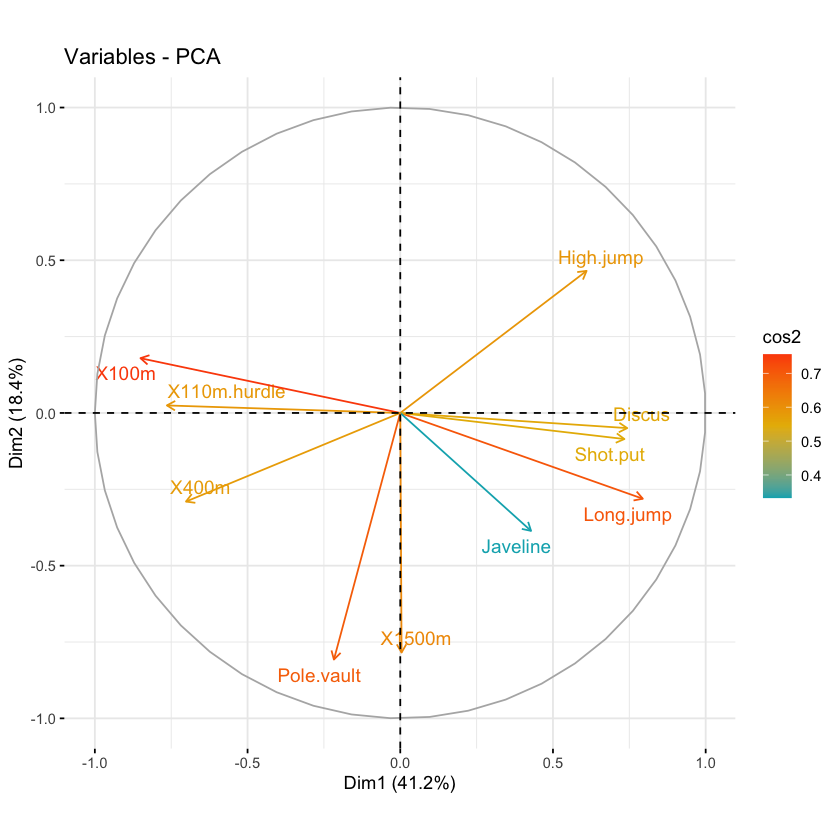

In [17]:
# Color by cos2 values: quality on the factor map. With different colors.
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

#A high cos2 indicates a good representation of the variable on the principal component. 

var <- get_pca_var(res.pca)
print(var$cos2)

### Contributions of variables to PCs

The contributions of variables in accounting for the variability in a given principal component are expressed in percentage.

- Variables that are correlated with PC1 (i.e., Dim.1) and PC2 (i.e., Dim.2) are the most important in explaining the variability in the data set.
- Variables that do not correlated with any PC or correlated with the last dimensions are variables with low contribution and might be removed to simplify the overall analysis.

The contribution of variables can be extracted as follows:

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

                    Dim.1      Dim.2      Dim.3       Dim.4     Dim.5
X100m        1.754429e+01  1.7505098  7.3386590  0.13755240  5.389252
Long.jump    1.529317e+01  4.2904162  2.9300944  1.62485936  7.748815
Shot.put     1.306014e+01  0.3967224 21.6204325  2.01407269  8.824401
High.jump    9.024811e+00 11.7715838  8.7928883  2.54987951 23.115504
X400m        1.193554e+01  4.5799296  6.4876363 22.65090599  1.539012
X110m.hurdle 1.415754e+01  0.0332933 16.2612611  0.03483735  7.166193
Discus       1.339309e+01  0.1341398  2.5147385 19.04132022 23.755756
Pole.vault   1.144592e+00 35.4618611  0.7139512 14.02307063  7.005084
Javeline     4.446377e+00  8.1086683 29.4531777 13.42963254  5.577615
X1500m       4.438531e-04 33.4728757  3.8871610 24.49386930  9.878367
                    Dim.6       Dim.7       Dim.8      Dim.9      Dim.10
X100m         0.295915322  2.75705260  3.99520353 59.1740009  1.61756139
Long.jump     0.269003613  7.87159392 57.53322220  1.7146826  0.72414393
Shot.put   

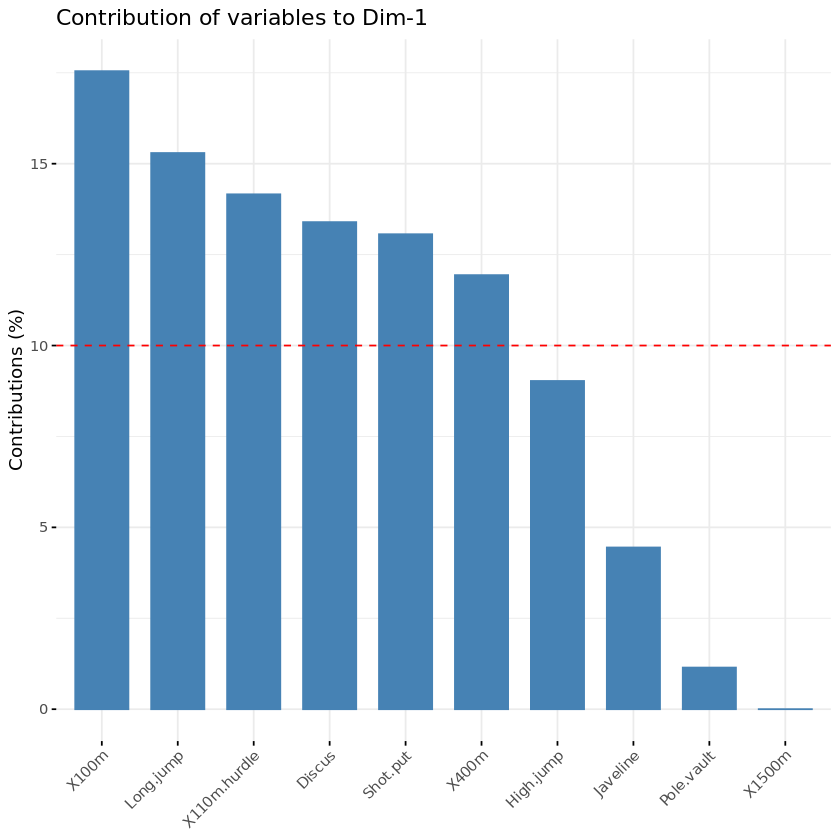

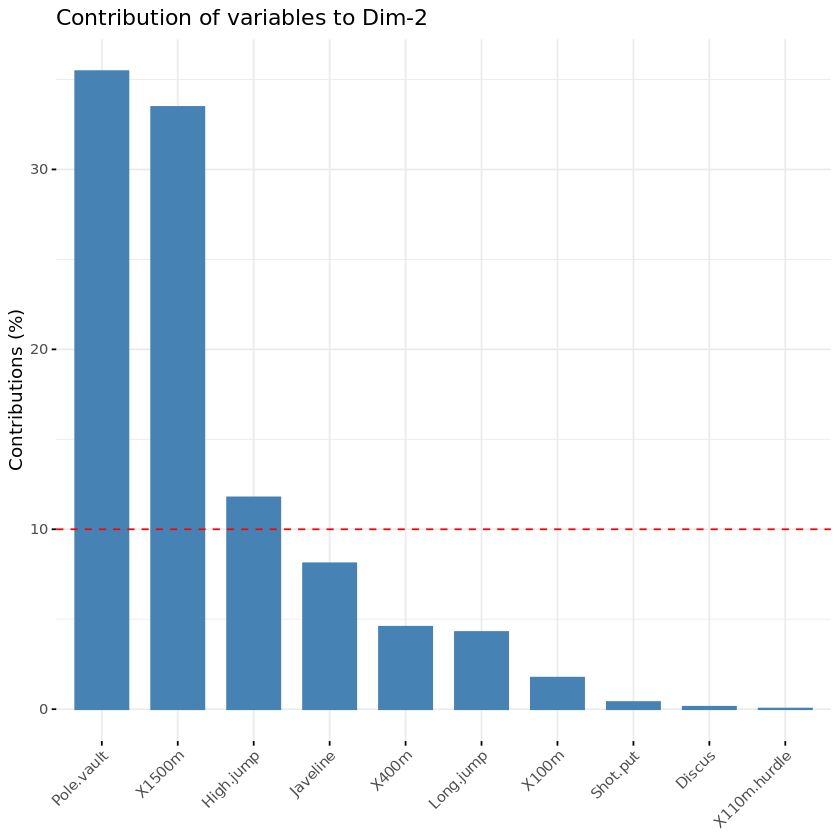

In [17]:
var <- get_pca_var(res.pca)
var

# Contribution of variables
print(var$contrib)

# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

#The red dashed line on the graph above indicates the expected average contribution. 
#If the contribution of the variables were uniform, the expected value would 
#be 1/length(variables) = 1/10 = 10%. For a given component, a variable with a 
#contribution larger than this cutoff could be considered as important in contributing 
#to the component.

#The larger the value of the contribution, the more the variable contributes to 
#the component!

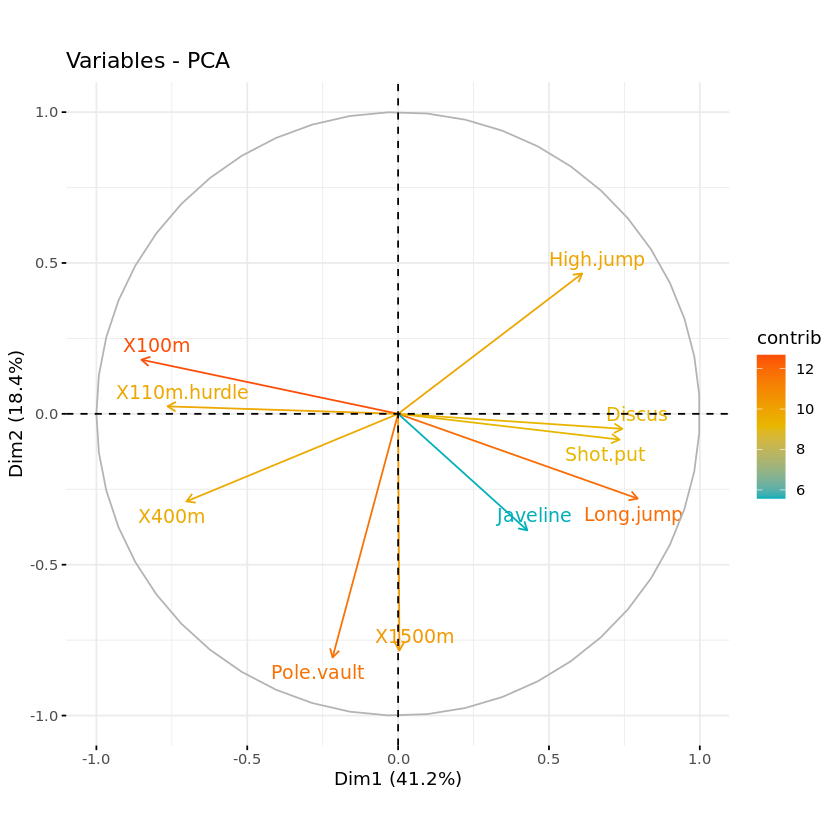

In [16]:
#Graph of variables. Positive correlated variables point to the same side of the plot. 
#Negative correlated variables point to opposite sides of the graph.

#The closer a variable is to the circle of correlations, 
#the better its representation on the factor map 
#(and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the 
#first components.

fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

#var$contrib: contains the contributions (in percentage) of the variables 
#to the principal components. The contribution of a variable (var) to a given 
#principal component is (in percentage) : (var.cos2 * 100) / (total cos2 of the component).

### Analyzing individuals

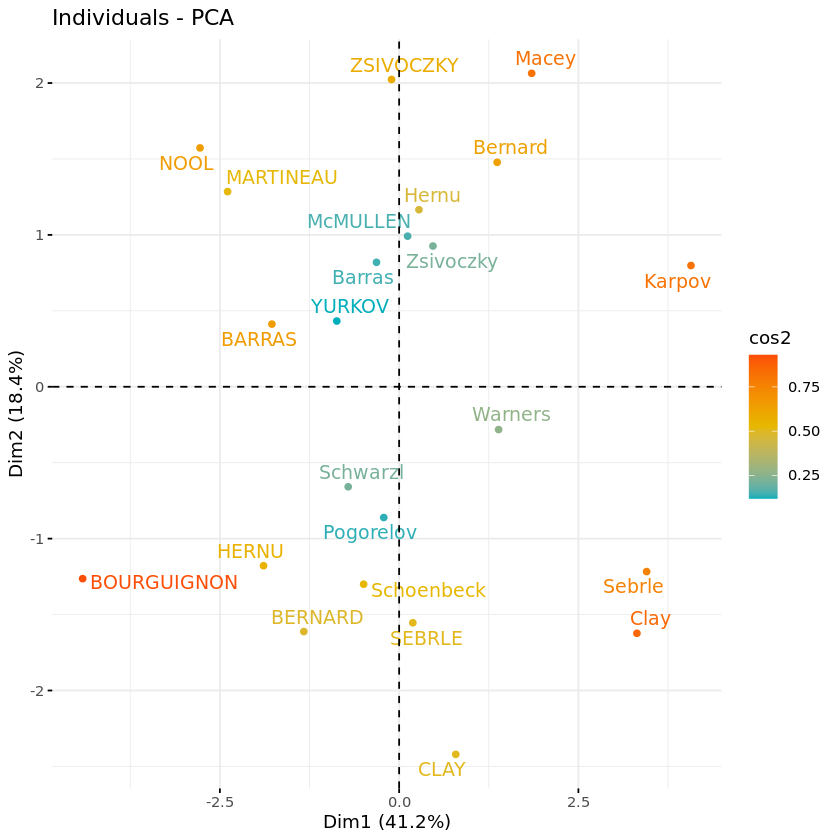

In [3]:
#Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )


#A high cos2 indicates a good representation of the individual on the principal component. 

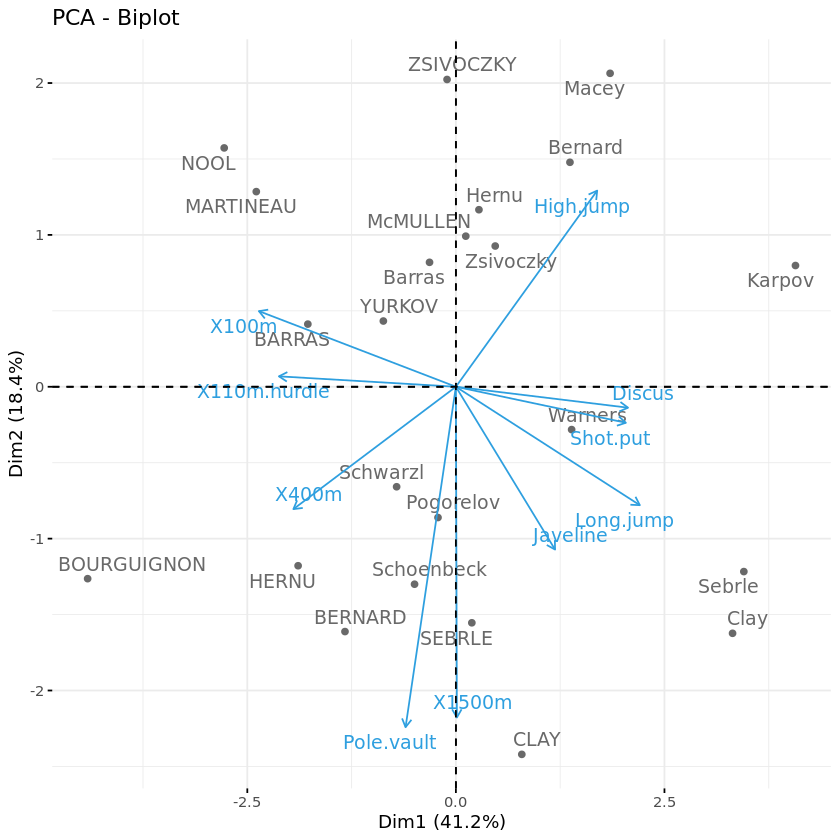

In [5]:
#Biplot of individuals and variables

fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

### Showing the clusters

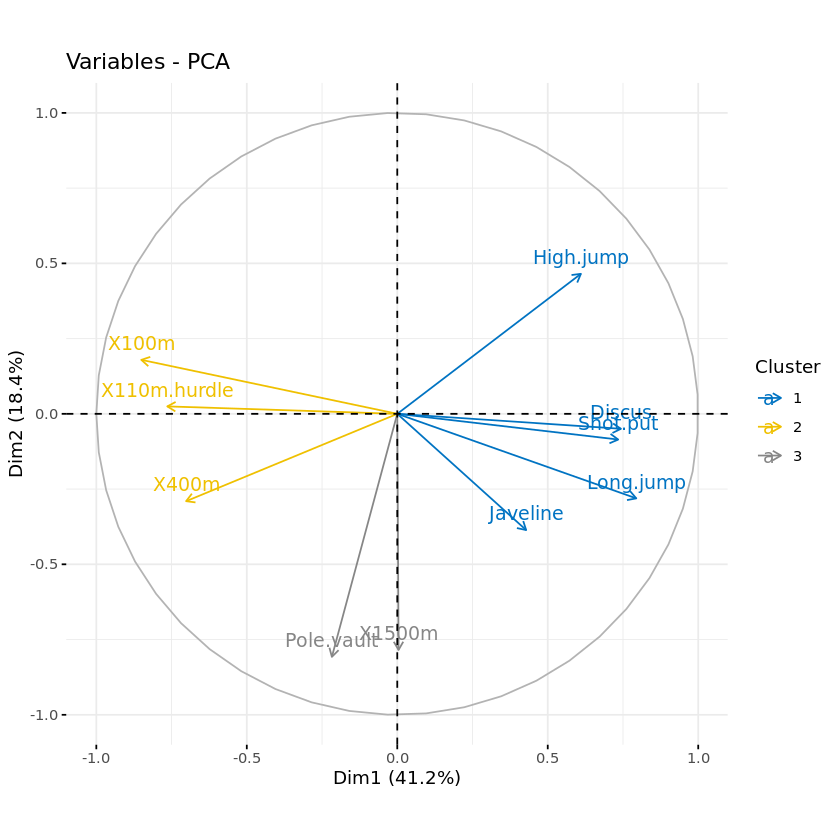

In [18]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

### Another example

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


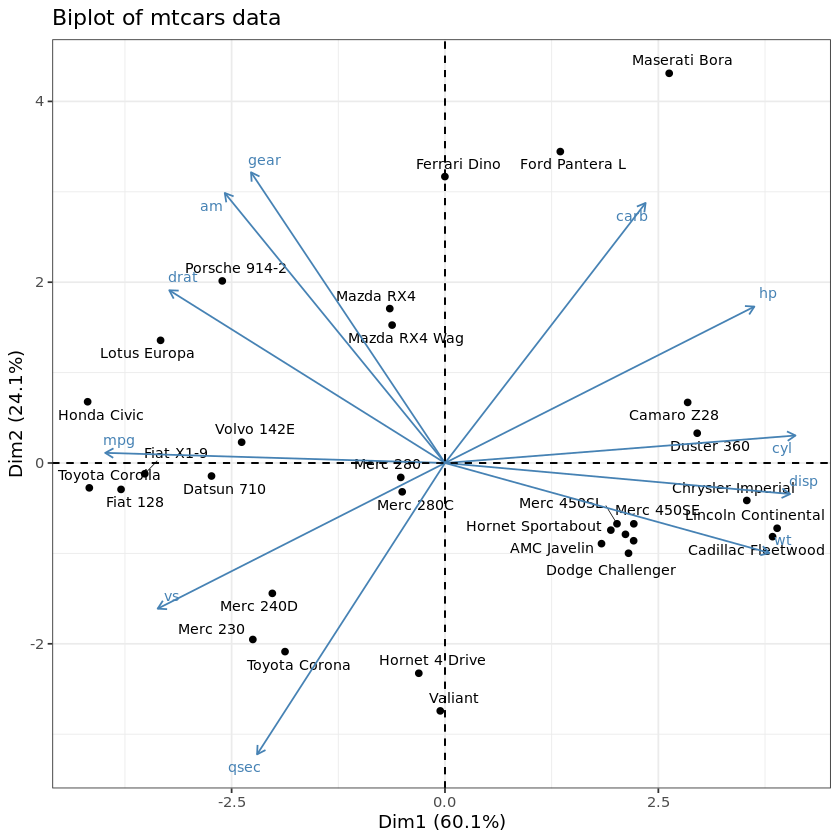

In [1]:
#sudo apt-get install r-cran-car
#install.packages("factoextra")

# create a biplot
# load data
data(mtcars)
help(mtcars)

# fit a principal components model
fit <- prcomp(x = mtcars,  
              scale = TRUE) #scale: standardize the values.

# plot the results
library(factoextra)
fviz_pca(fit, 
         repel = TRUE, 
         labelsize = 3) + 
  theme_bw() +
  labs(title = "Biplot of mtcars data")

#https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars

In this graph, the first PC accounts for 60% of the variability in the original data. The second PC accounts for 24%. Together, they account for 84% of the variability in the original p = 11 variables.

As you can see, both the observations (cars) and variables (car characteristics) are plotted in the same graph.

- Points represent observations. Smaller distances between points suggest similar values on the original set of variables. For example, the Toyota Corolla and Honda Civic are similar to each other, as are the Chrysler Imperial and Liconln Continental. However, the Toyota Corolla is very different from the Lincoln Continental.

- The vectors (arrows) represent variables. The angle between vectors are proportional to the correlation between the variables. Smaller angles indicate stronger correlations. For example, gear and am are positively correlated, gear and qsec are uncorrelated (90 degree angle), and am and wt are negatively correlated (angle greater then 90 degrees).

The observations that are are farthest along the direction of a variable’s vector, have the highest values on that variable. For example, the Toyota Corolla and Honda Civic have higher values on mpg. The Toyota Corona has a higher qsec. The Duster 360 has more cylinders.